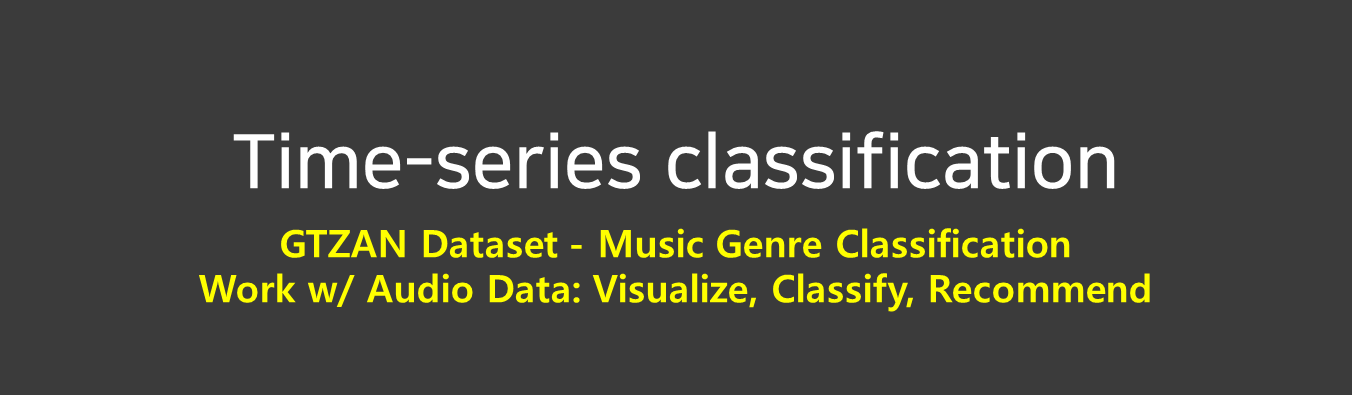

Reference : [Work w/ Audio Data: Visualize, Classify, Recommend] (https://www.kaggle.com/code/andradaolteanu/work-w-audio-data-visualise-classify-recommend)

# **1. Introduction**


**시계열 데이터 [Time series data]**

1. 특정한 기간에 걸쳐서 계속적인 동등한 공간적 시점에서 수량이 기록되는 자료를 말한다.

2. 시간의 경과에 따라 변동하는 값을 관측값으로 하여 기록된 것. 구성에는 많은 요소가 포함되며 순환적 변동, 계절적 변동, 경향적 변동 등이 있다.

3. 시계열 데이터의 분석 목적은 시계열이 갖고 있는 법칙성을 발견해 이를 모형화하고, 또 추정된 모형을 통하여 미래의 값을 forecasting 또는 자료를 classifcation하는 것이다. 
   
    ex) 주가 추이 분석, 날씨 예측, 반도체 직접 회로과 관련된 Moore's law, 상품 매출 분석, 기계 공학 박사 학위자 수

# **2. Learning Objectives**
***


* 시계열 데이터를 처리하는 방법과 그에 대한 결과를 분석하는 능력 함양


* 실제 실험 데이터를 얻었을 때, 이를 예제 코딩에 접목시킬 수 있는 능력 향상     
                
    ex) Data Augmentation and Deep Learning for the Fault Diagnosis of Rotating Machines


* 기계학습 및 딥러닝을 다양한 분야에 대해서 적용하기 위한 경험 쌓기     
                
    ex) space, medicine, construction environment, etc.


* Sound data (Audio files)를 visualization하는 방법 및 classification하는 방법 익히기, 관련 Library 학습 진행

# **3. Purpose**
***
##### **본 과제에서는 소리(Time-series data, sound)에 대한 심층 분석과 소리를 시각화 및 분류하며 그에 대한 결과를 궁극적으로 이해하는 방법에 대해 설명한다**

1. 오디오 파일에 대한 이해와 이러한 종류의 데이터를 시각화할 수 있는 특성이 무엇인지 알아보기

2. EDA (Exploratory data analysis) : 탐색적 자료 분석   

    ###### 기본적으로 데이터 자체에 대한 초기 해석 및 분석이 잘못되면, 열심히 짠 코드의 데이터 프레임과 시각화한 그래프들이 dummy data가 됨    
    ###### 따라서 시각화 같은 도구를 통해서 패턴을 발견하거나, 데이터의 특성을 확인하고, 통계와 그래픽을 통해 가설을 검정하는 과정을 말함   
    

3. 3초 길이에 해당하는 오디오 파일에 대해 장르를 분류하기 (다양한 딥러닝 모델을 시도 및 정확도가 가장 높은 모델을 식별하는 것이 목적)


4. A recommender system : 노래(장르)가 주어지면 해당 노래와 가장 유사한 상위 X개의 노래를 추천해주는 시스템


# **4. The data**
***

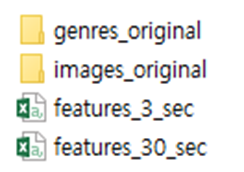
* genres original : 서로 다른 10개의 장르로 구성되며, 각 장르마다 100개의 오디오 파일 존재 (GTZAN dataset, the MNIST of sounds)

* images original : 각 오디오 파일에 대한 spectrogram 이미지화

* 30초 오디오 파일 (.csv) : 각 오디오 파일(30초 길이 장르별 노래)에 대해 오디오 파일에서 추출할 수 있는 여러 특성에 대해 계산된 평균 및 분산이 존재

* 3초 오디오 파일 (.csv) : 30초 길이의 오디오파일과 동일한 구조를 가지고 있지만, 오디오 파일을 3초 길이로 분할

# **5. Coding**
***

### **<span style="color: Red">1) 사용하는 라이브러리 가져오기</span>**

**Usal Libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

**Librosa (the mother of audio files)**

In [5]:
import librosa
import librosa.display
import wave
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

* pandas 및 numpy : 시계열 데이터를 조작하기 위한 데이터 분석 및 연산 제공 라이브러리
* seaborn, matplotlib : 데이터의 시각화를 보조해주는 라이브러리
* sklearn(scikit-leanr) : 학습을 도와주는 Machine Learning 라이브러리
* Librosa : 음향 데이터를 다양한 형태로 변환해주는 라이브러리

**장르명 10개 확인**

In [6]:
import os
general_path = './Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


### **<span style="color: RED">2) Explore Audio Data</span>**

Reggae 장르의 36번 노래 불러오기  

* y, sr = librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav')


y : 음향파일의 Amplitude를 numpy 배열로 불러옴
  : 소리가 떨리즌 세기(진폭)를 시간 순서대로 나열한 것 (time domain audio signal)

* (661794,)
    
sr : 음향파일의 Sampling Rate, 1초 당 sample의 개수

* 현재 sr : default 값, 22050


* **음악의 길이 = 음파 길이 / sr**


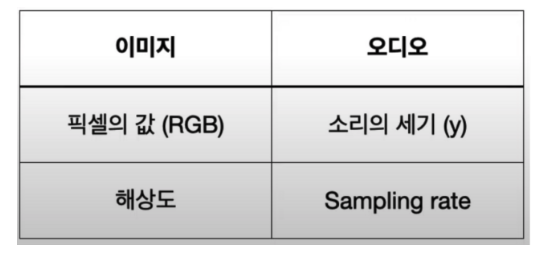             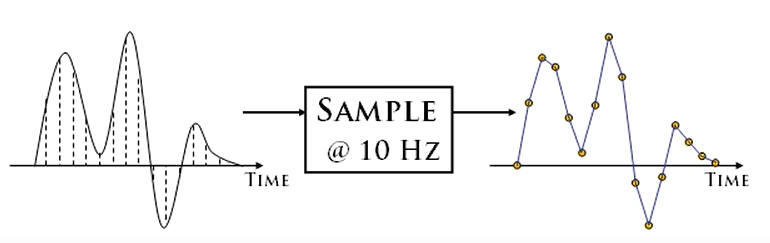


In [7]:
y, sr = librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav') 


print('y:', y)
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388]
y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [8]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


비어있는 부분은 자른 후 배열 나타내기
따라서 Audio file(y)의 출력은 배열이 1차원이고 661794의 요소를 포함

    Audio file, _ : librosa.effects.trim(y)


### **<span style="color: RED">3) 2D Representation: Sound Waves / Plot & FFT</span>**

**Reggae 장르 중 36번 노래에 대한 시계열 데이터 Plot**

Text(0.5, 1.0, 'Sound Waves in Reggae 36')

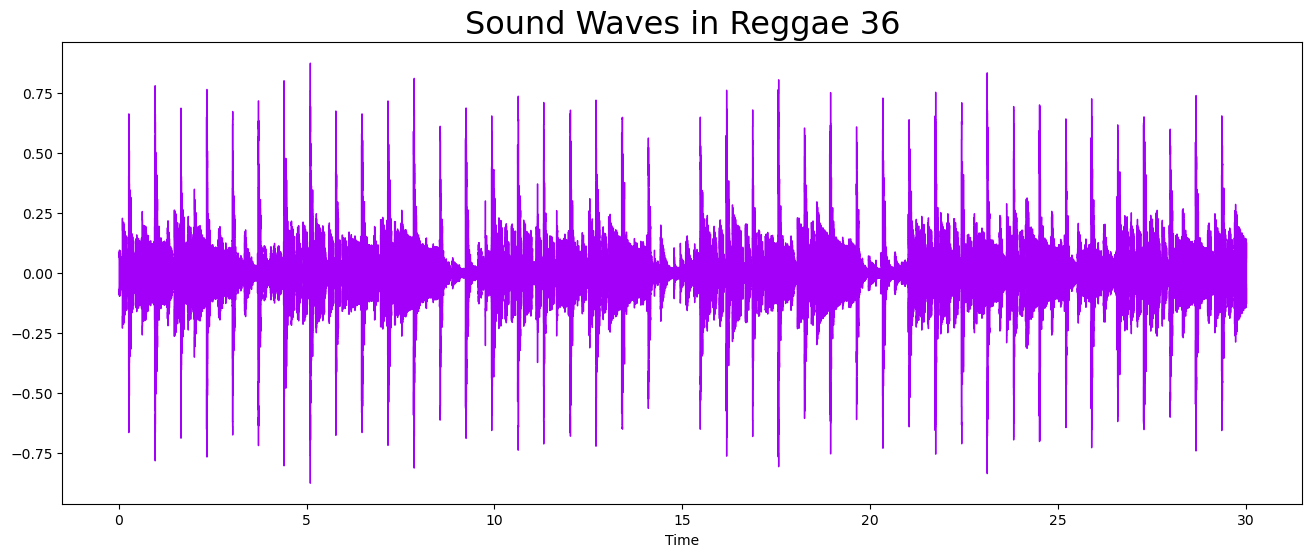

In [9]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9")
plt.title("Sound Waves in Reggae 36", fontsize = 23)


**Reggae 장르 중 36번 노래에 대한 STFT 진행**




* **FFT(Fast Fourier transform)** : 시간이나 공간에 대한 함수를 시간 또는 공간 주파수 성분으로 분해하는 변환을 의미한다.

    : sound data는 시간 축에 대해 진폭 성분으로 표시 -> 진폭 성분은 sound data의 특징을 사용하기 어려움 -> 크기는 성분 변화의 가능성이 높음 

    : 따라서 일반적으로 소리 데이터를 분석할 때는 시간축을 주파수 축으로 변환하여 처리  
    
    : FFT(Fast Fourier transform) : (https://terms.naver.com/entry.naver?docId=1061952&cid=40942&categoryId=32219)




* **Short-Time Fourier Transform**  
    
    : 시계열을 일정한 시간 구간으로 나누고 각 구간에 대해서 스펙트럼을 구한 데이터, 시간-주파수의 2차원 데이터로 나타낸다.  

    : 음성 신호를 기존 FFT를 이용해 분해해버리면 이 주파수 성분이 단지 함수로 분해될 뿐이기 때문에 언제 어디서 어떻게 존재하는지를 알 수 없다.  

    : 음성을 분석할 때 가장 중요한 기준이 되는 것이 시간이라는 점을 고려할 때 이는 큰 문제점이 된다.    

    : 따라서 이를 해결하기 위해서 FFT를 하기 전에 먼저 시간을 짧게 나눠버리게 되면 문제가 해결됨으로 STFT를 사용한다.



In [10]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


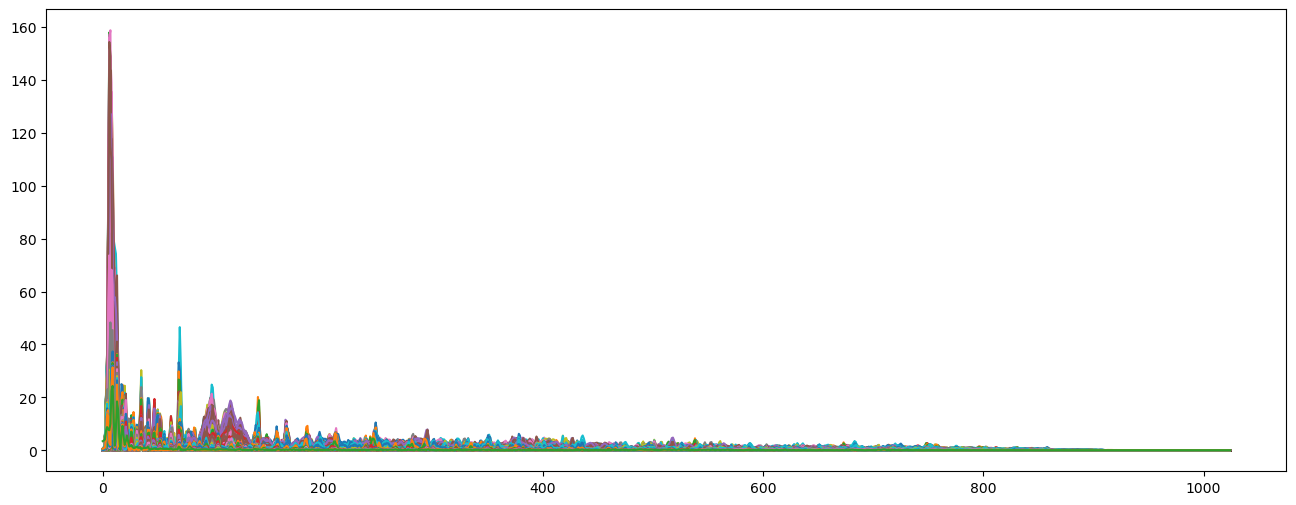

In [16]:
plt.figure(figsize = (16, 6))
plt.plot(D)

### **<span style="color: RED">4) Convert an amplitude spectrogram to Decibels-scaled spectrogram</span>**

* X axis : Time
* Y axis : Frequency
* Color : 각 시간 당 주파수가 가지는 값 , 데시벨(Amplitude)
* hop_length : 음성의 magnitude를 얼만큼 겹친 상태로 잘라서 보여줄 것인지를 정하는 변수 (Window 간의 거리), number of audio samples beween adjacent STFT coulumns


   * What is the Spectrogram ? 

      : 푸리에 변환을 사용하면 특정 시간 길이의 음성조각(이를 frame이라고 부름)이 각각의 주파수 성분들을 얼마만큼 갖고 있는지를 의미하는 스펙트럼(spectrum)을 얻을 수 있다.

      : 이렇게 음성 전체로부터 얻은 여러개의 스펙트럼을 시간 축에 나열하면 시간 변화에 따른 스펙트럼의 변화인 스펙트로그램(spectrogram)을 얻게 된다.
    
      : 스펙트로그램은 소리나 파동을 시각화하여 파악하기 위한 도구로, 파형과 스펙트럼의 특징이 조합되어 있다. 

      : 파형에서는 시간축의 변화에 따른 진폭 축의 변화를 볼 수 있고, 스펙트럼에서는 주파수 축의 변화에 따른 진폭 축의 변화를 볼 수 있음 
          
      : 스펙트로그램에서는 시간축과 주파수 축의 변화에 따라 진폭의 차이를 농도 / 색상의 차이로 나타낸다.
      
      : 사람의 귀 또한 이와 유사한 메커니즘을 갖고 있어 소리에 들어있는 각각의 주파수 성분들을 추출하는 방식으로 청취한 소리에 내재된 정보들을 얻는 것이다.

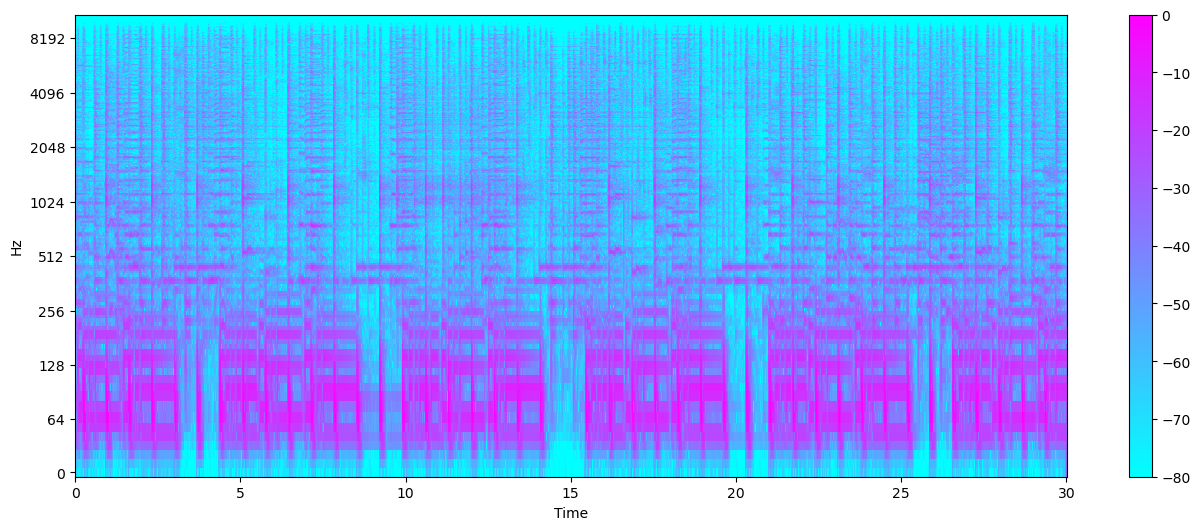

In [11]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar()

### **<span style="color: RED">5) Mel spectrogram</span>**

#####  **Mel Spectrogram**    

**: (인간이 이해하기 힘든) Spectrogram의 y축을 Mel Scale로 변환한 것 (Non - linear transformation)**     



사람들은 음성 신호를 인식할 때 주파수를 linear scale로 인식하지 못한다. (낮은 주파수를 높은 주파수보다 더 예민하게 받아들이기 때문)

즉, 500 Hz에서 1000 Hz로 바뀌는건 인식하지만, 10000 Hz에서 10500 Hz로 바뀌는 것은 잘 인식하지 못한다.

따라서 이러한 주파수 대역을 mel scale을 통해 변화를 인식할 수 있도록 한다.

Mel-scale은 사람의 음을 인지하는 기준(threshold)을 반영한 scale 변환 함수이다.

log 함수를 통과시켜 mel scale로 바꿈으로써 linear하게 다룰 수 있다.

* Mel spectrogram 함수 : 

     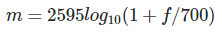


##### **Window**

**: 진동, 음향 신호를 FFT 분석할 경우에 FFT 연산에 필요한 데이터 수는 유한개이므로, 시간축 신호를 어느 구간 T만 잘라내어 그 부분만을 연산하는 방식을 취하는 것**    

[출처] (https://blog.naver.com/rudwns7983/222498276447)

Text(0.5, 1.0, 'Metal Mel Spectrogram')

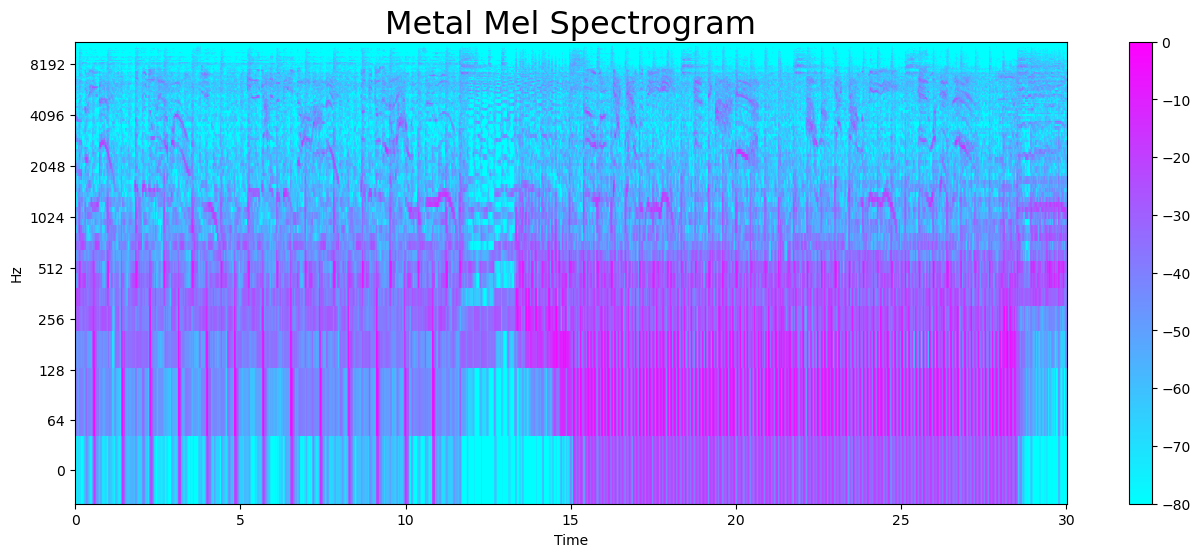

In [12]:
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar()
plt.title("Metal Mel Spectrogram", fontsize = 23)

Text(0.5, 1.0, 'Classical Mel Spectrogram')

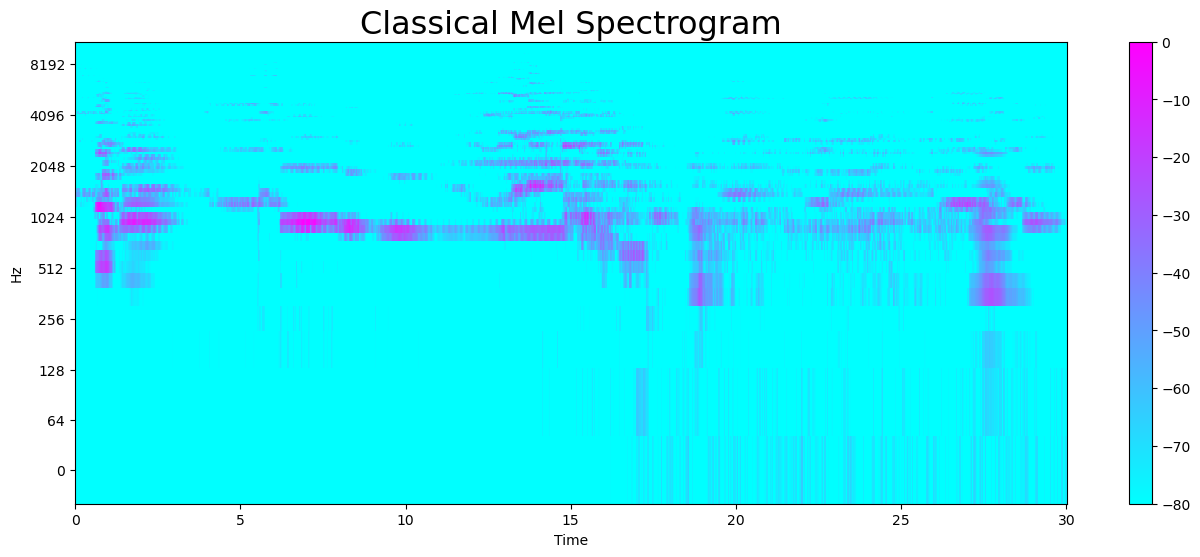

In [23]:
y, sr = librosa.load(f'{general_path}/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar()
plt.title("Classical Mel Spectrogram", fontsize = 23)

### **<span style="color: RED">6) Audio Features</span>**

**Zero crossing rate**

: 음성 신호를 처리하는 방법 중 하나로, 음파가 양에서 음으로 또는 음에서 양으로 바뀌는 비율  
: voiced와 unvoiced를 구분할 수 있도록 해준다.

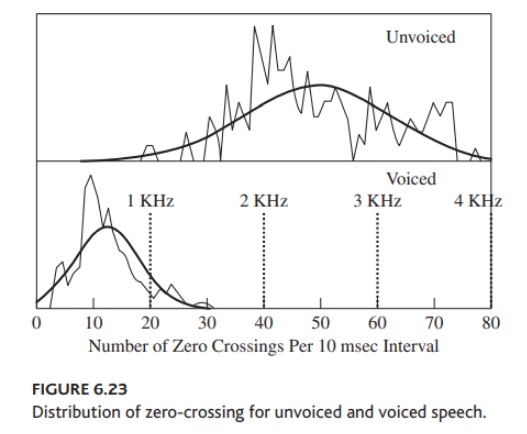

: Noise한 영역에서는 에너지의 차이가 생겨 zero crossing rate가 크며, voised 영역에서는 zero crossing rate가 작아짐을 알 수 있다.    
: 에너지와 zero crossing rate는 trade off 관계에 있다.

[출처] Pearson._Rabiner, Lawrence R._ Schafer, Ronald W - Theory and applications of digital speech processing-Pearson_Prentice Hall (2010_2011)

In [13]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

39232


Mel spectrogram : 음악에서 리듬이나 감성을 분석하는 경우에 사용하며, 하모니, pitch, 리듬, 템포를 분석할 수 있음 

* Harmonic(화성) : 사람의 귀로 구분할 수 없는 특징들 / 하모니, pitch(음높이)
* Percussive(타악기 성분) : 리듬과 감정을 나타내는 충격파 / 리듬, 템포

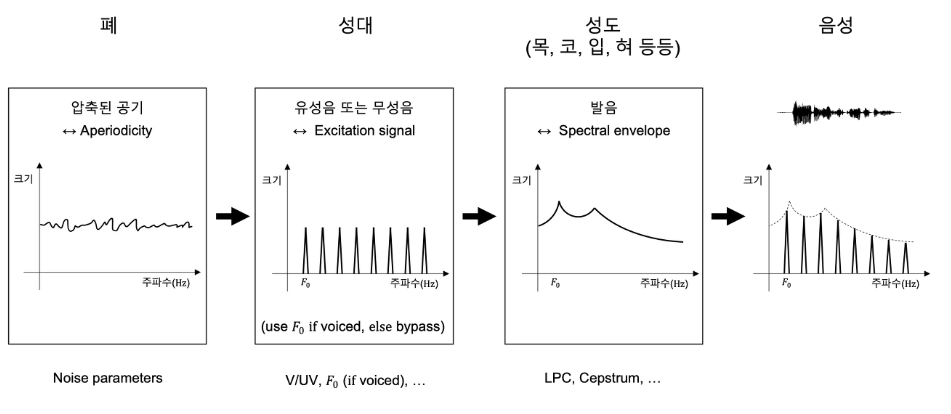

[출처] (https://tech.kakaoenterprise.com//66)

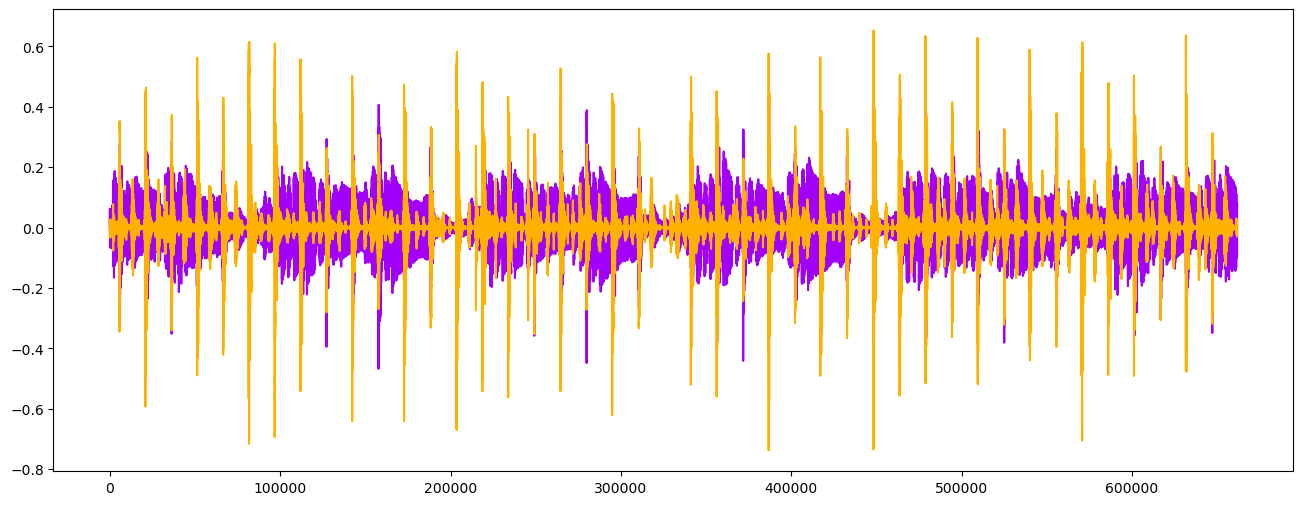

In [14]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9') # 보라색
plt.plot(y_perc, color = '#FFB100') # 주황색

In [15]:
tempo, _ = librosa.beat.beat_track(y, sr = sr)
tempo

143.5546875

**Spectral Centroid**   

* 소리를 주파수로 표현했을 때, 주파수의 가중평균을 계산하여 소리의 '무게중심'이 어디에 있는지를 알려주는 지표   

* 예를 들어, 블루스 음악은 무게 중심이 가운데 부분에 놓여있는 반면, 메탈 음악은 보통 끝 부분에 하이라이트가 있기 때문에 노래의 마지막 부분에 무게 중심이 실린다.


In [16]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1758.29476432 1946.74243678 2038.8113414  ...  766.50416352 1041.07728901
 1391.05145642] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


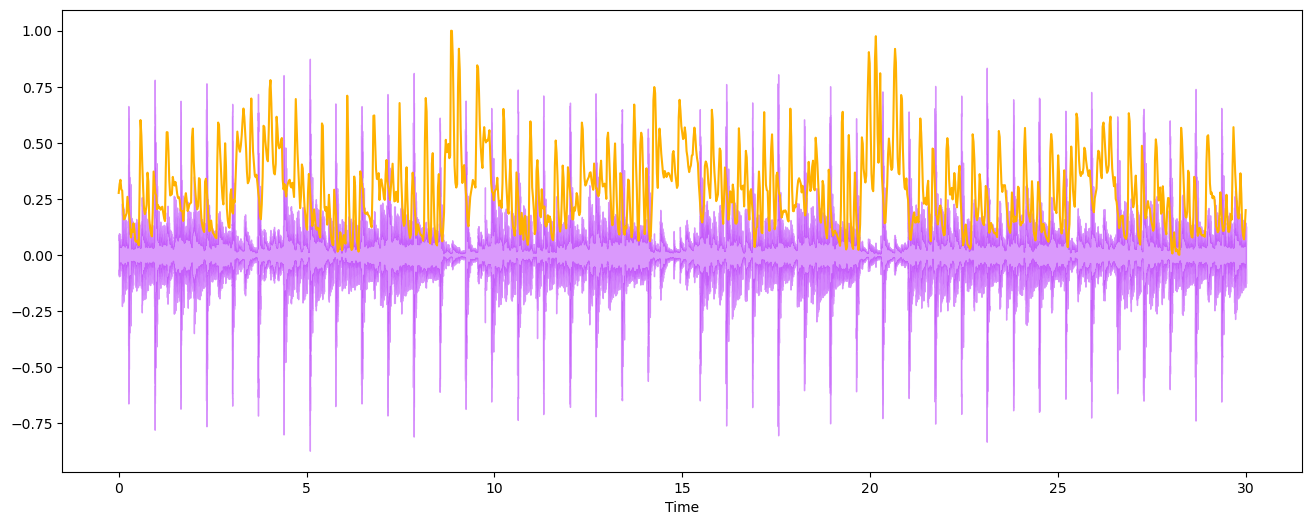

In [17]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9') # 보라색
plt.plot(t, normalize(spectral_centroids), color='#FFB100') # 주황색

**Spectral Rolloff**    

* 신호 모양을 측정한다. 

* 총 스펙트럴 에너지 중 낮은 주파수(85% 이하)에 얼마나 많이 집중되어 있는지를 알려주는 것 

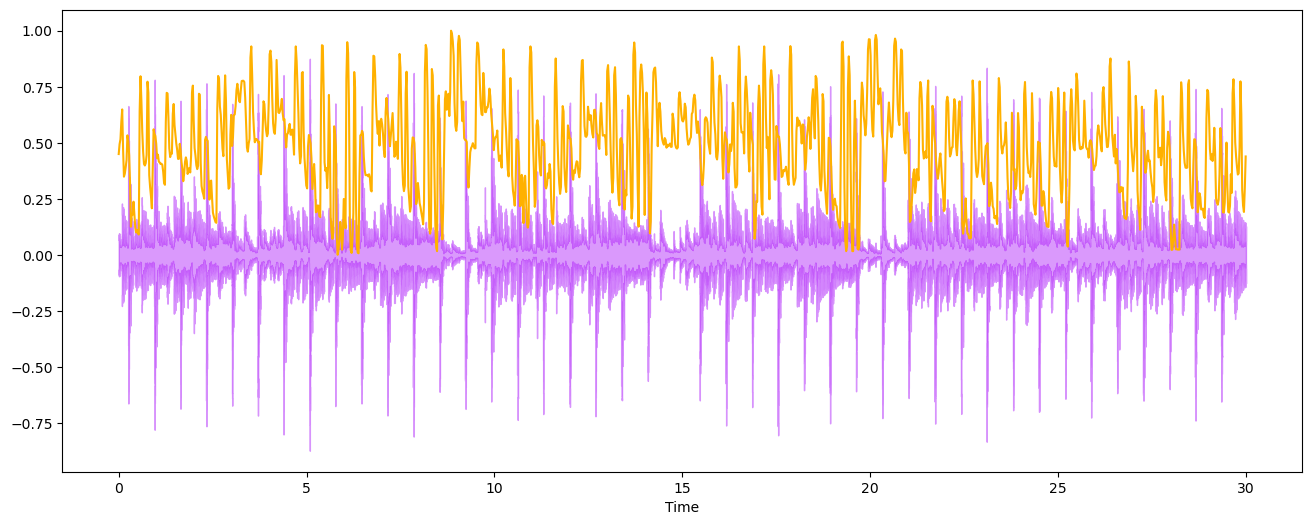

In [18]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9'); # 보라색
plt.plot(t, normalize(spectral_rolloff), color='#FFB100'); # 주황색

**Mel-Frequency Cepstral Coefficients (MFCCs)** 

* 음성인식 영역에서 대표적으로 사용되는 특징 베터이다.  

* MFCCs는 특징들의 작은 집합 (약 10~20)으로 스펙트럴 포곡선의 전체적인 모양을 축약하여 보여준다.    

* 사람의 청각 구조를 반영햐여 음성 정보를 추출  

**MFCC 추출 방법**

1. 전체 오디오 신호를 일정 간격으로 나누고 푸리에 변환을 거쳐 스펙트로그램을 구한다.    

2. 각 스펙트럼의 제곱인 파워 스펙트로그램에 Mel scale filter bank를 사용하여 차원 수를 줄인다.  

3. cepstral 분석을 적용하여 MFCC를 구한다.  




**Cepstral**  

 : 푸리에 변환을 거쳤을 때 시간 축에서 천천히 변하는 정보가 낮은 주파수 성분에 위치하고, 빨리 변하는 정보가 높은 주파수 성분에 위치한다는 점에 착안한 방법  

 : 주파수 축에서 다시 한 번 푸리에 변환을 사용하면 천천히 변하는 스펙트럼 포락선 정보는 낮은 성분에 위치하고, 빨리 변하는 여기 신호(excitation signal) 정보는 높은 성분에 위치하게 된다. 
   
 : 적절한 취사 선택을 통해 원하는 정보가 내재된 특징 벡터(MFCC)를 만들 수 있다.

 [출처] (https://tech.kakaoenterprise.com//66)


mfccs shape: (20, 1293)


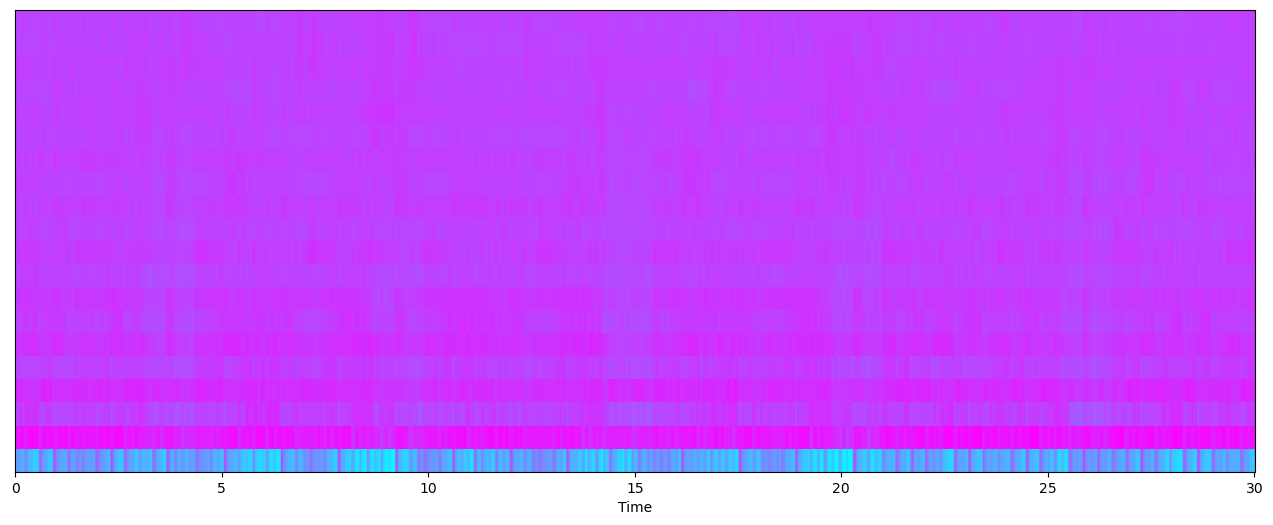

In [19]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool')

Mean: -1.3276209e-09 

Var: 1.0000001


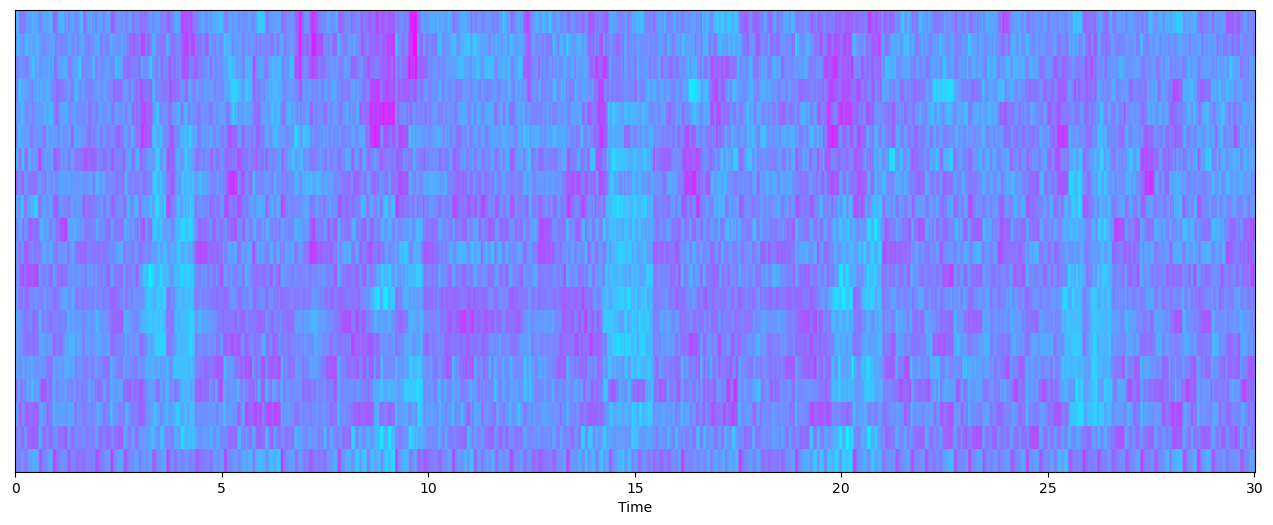

In [24]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool')

**Chromagram**  

* 음악에서 선율(melody)나 코드 추출에 사용    

* 음악 신호를 짧은 길이(수 십 ~ 수 백 ms)의 프레임 단위로 나누고 각 프레임에서 스펙트럼을 구하고 옥타브 차이 나는 음악 스펙트럼 성분들을 가산하여,  
  음악의 전체 스펙트럼 성분들을 하나의 옥타브 안으로 접어서 표현한 것 

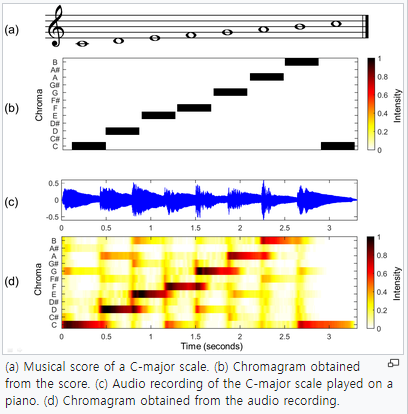

* hop_length가 클수록 입자들의 크기가 커지고, hop_length가 작을수록 입자들의 크기가 작아진다. 

  * hop_length : 음성의 magnitude를 얼만큼 겹친 상태로 잘라서 보여줄 것인지를 정하는 변수 (Window 간의 거리), number of audio samples beween adjacent STFT coulumns


Chromogram shape: (12, 133)


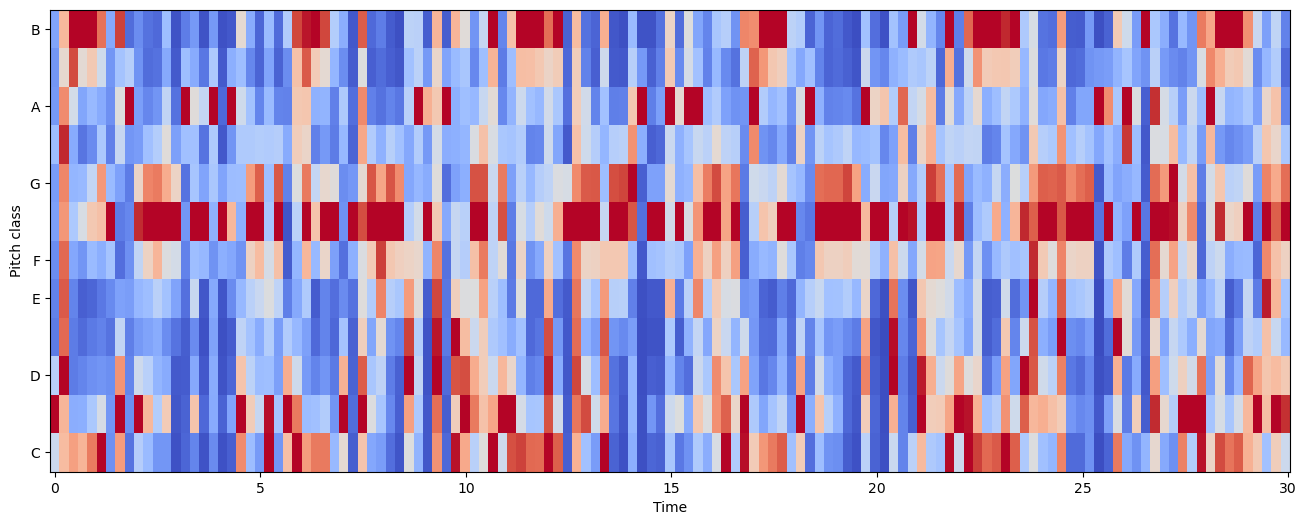

In [20]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

### **<span style="color: RED">7) EDA(Exploratory Data Analysis)</span>**

**Correlation Heatmap for feature means**   

* 직사각형 데이터를 색상으로 인코딩된 행렬로 표시

[Heatmap] (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [21]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head() # 상위 5개 데이터에 대해서 출력해준다.

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


**Computing the Correlation Matrix**

* corr 메서드는 각 열 간의 상관 계수를 반환하는 메서드
* 현재 spike_cols는 30초 길이의 오디오 파일에서 mean 값이 들어가 있는 열을 반환하여 나타냄
* corr을 통해 가로축과 세로축이 spike_cols의 목록으로 설정한다.

In [22]:
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

**corr의 값을 나타내는 이미지** 

* index와 coulumns가 동일한 값으로 들어있는 것을 확인   

* A와 B의 상관계수가 1에 가까워질수록, 하나가 증가할 때 다른 하나도 함께 증가하는 경향이 나타나고, -1에 가까워질수록 하나가 증가하면 다른 하나가 감소하는 경향이 있음을 의미    

* Row(index)의 번호가 columns의 번호가 동일할 때는 내 자신에 대한 상관계수이므로 항상 1이 나온다. (항상 함께 증가 or 함께 감소)


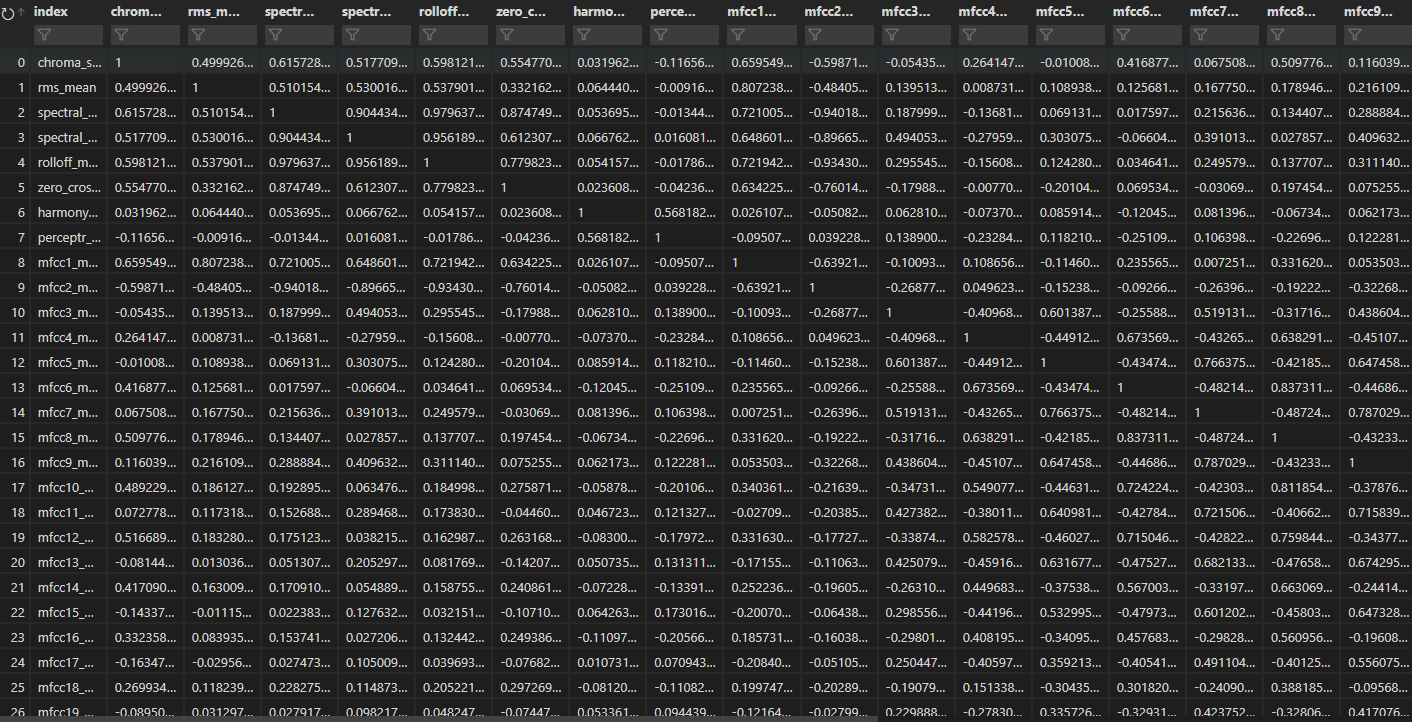

**Generate a mask for the upper triangle**  

* 기존 heat map에서 대각선을 기준으로 위쪽 삼각형과 아래쪽 삼각형의 값이 동일하므로, 위쪽 삼각형 값을 제거하여 시각화한다.

In [23]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

**Set up the matplotlib figure**

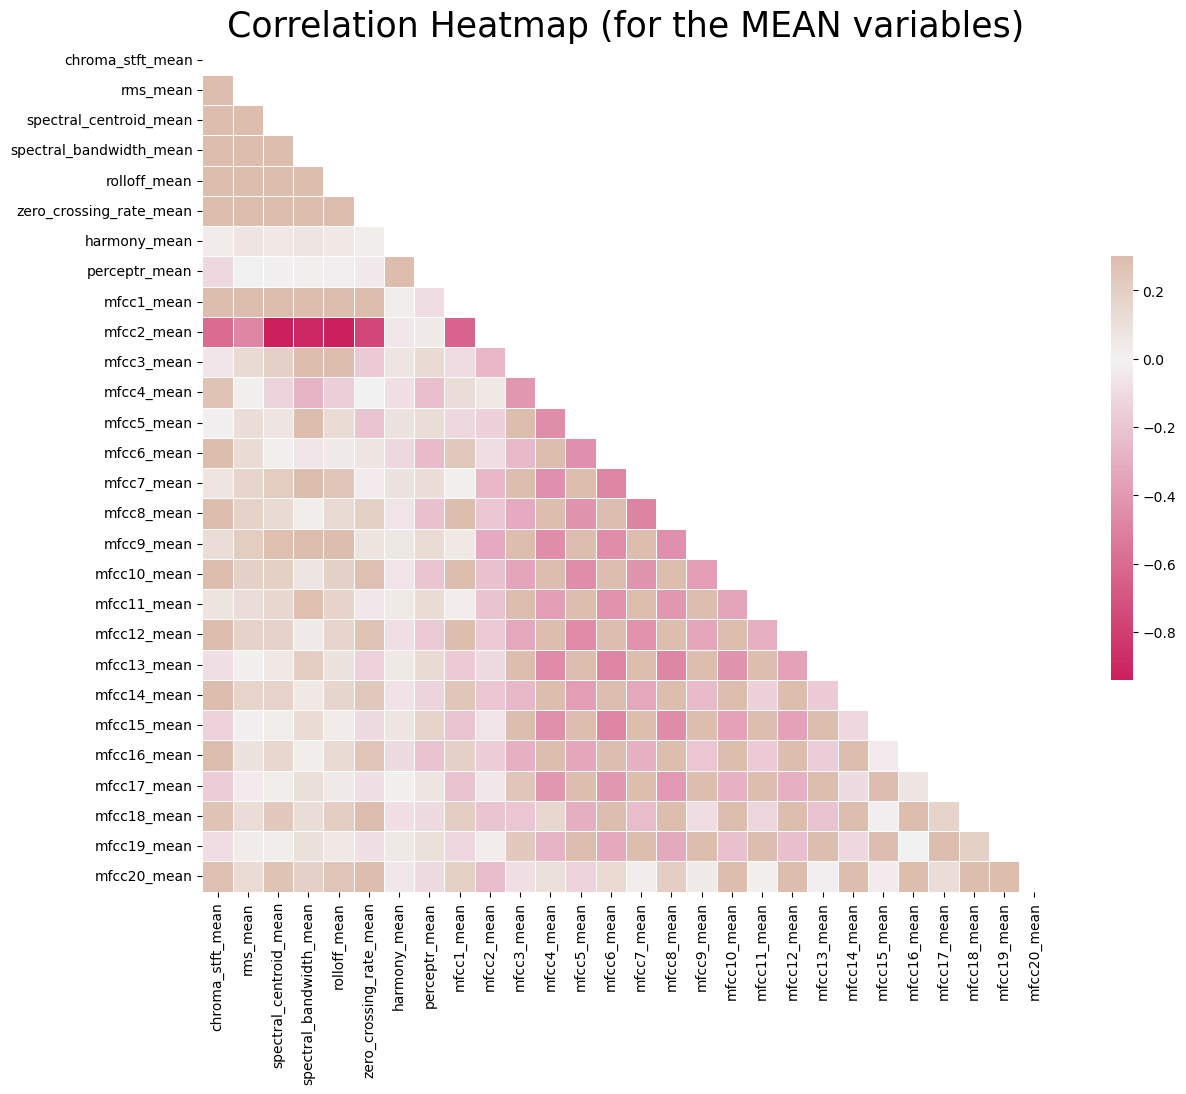

In [24]:
f, ax = plt.subplots(figsize=(16, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # 정사각형으로 만들고, 경계면 실선으로 구분하기, 컬러바 크기 절반으로 줄이기

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.savefig("Corr Heatmap.jpg")

**Box Plot for Genres Distribution**    

* 데이터의 각 종류별로 사분위 수(quantile)를 표시하는 plot.
* 특정 데이터의 전체적인 분포를 확인하기 좋은 시각화 기법
* box와 전체 range의 그림을 통해 outlier를 찾기 쉽다. (IQR : Inter-Quantile Range)

[Boxplot] (https://seaborn.pydata.org/generated/seaborn.boxplot.html)


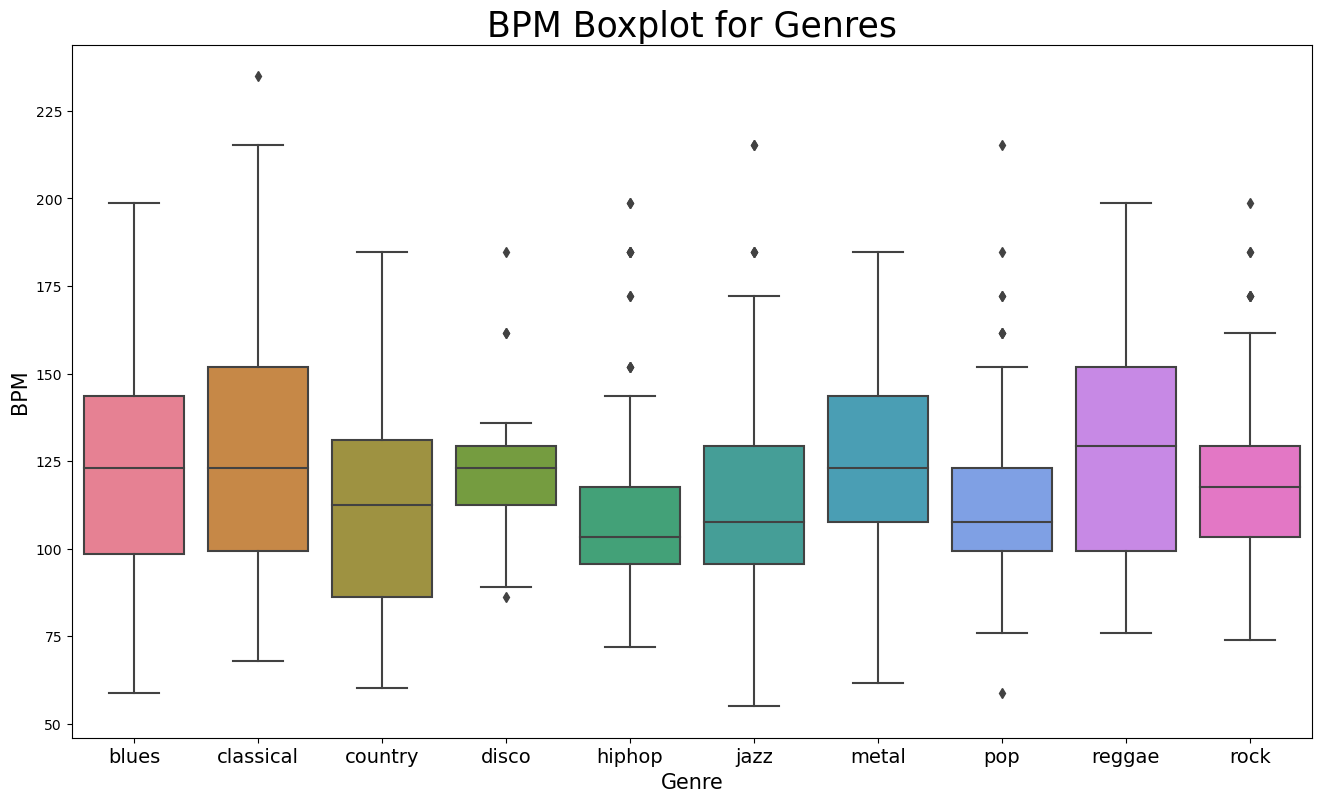

In [25]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl') # palette : 선명한 색상톤으로 설정

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

**Principal Component Analysis - to visualize the possible groups of genres**

1. Normalization    

2. PCA  

3. The Scatter Plot

**Normalization**   [출처] (https://blog.naver.com/goodji15/222973703586)

**정규화(normalization), 왜 하는가?**   

* 각 column에 들어있는 데이터의 상대적 크기로 인해 분석 결과가 달라질 수 있다.
* 예를 들어 A 변수는 0~1000까지의 값을, B 변수는 0~10까지의 값을 갖는다고 하자. 이 경우 상대적으로 큰 숫자 값을 갖는 A 변수의 영향이 더 커진다.
* 따라서 **숫자 데이터의 상대적인 크기 차이를 제거할 필요**가 있다.
* 즉, 데이터의 scale을 통일해야하는데, 이것을 rescaling이라고 한다. (normalization은 rescaling 중 하나의 방법)  


**정규화(normalization), 어떻게 하는가?**   

* 모든 column에 있는 데이터를 최소 0, 최대 1 사이의 비율 값으로 다 바꿔준다.
* **데이터들을 각 coulmun의 최댓값으로 나눠준다고 생각**하면 쉬우나, 데이터에 음수(-) 값이 존재할 수도 있음
* 따라서 최소값을 분모, 분자에 빼주는 과정이 요구된다.




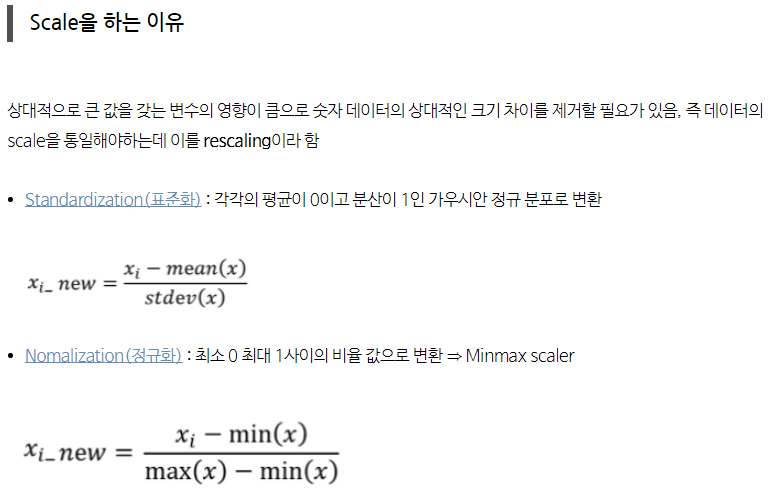  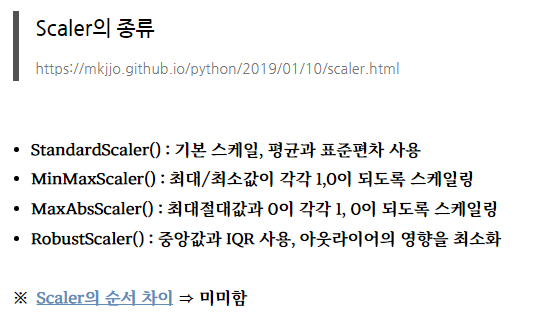

In [26]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2차원 축소
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.2439355 , 0.21781804])

**PCA (Principal Component Analysis) - 주성분 분석**

* 통계적 차원 축소 방법으로 데이터에 있는 정보를 대부분 유지하고자 한다.    

* '투영한다'와 '가장 큰 분산을 찾는다'가 키워드 (분산이 크다는 뜻은 데이터가 많이 퍼져있다는 뜻)    

* 데이터를 특정 축으로 투영시킨다고 했을 때 분산이 가장 큰 축을 찾고, 해당 축이 첫 번째 주성분이 된다.  
  그리고 첫 번째 주성분에 수직인 방향에 속하는 축 중에서 가장 많은 정보를 대변하는 축이 두 번째 주성분이 된다.  

* 위에서 구한 첫 번째 주성분과 두 번째 주성분은 크기와 방향을 가진 벡터 -> 데이터의 분포를 대변할 수 있음

    **위 과정처럼 주성분들을 찾는 것이 PCA이다.**


**Scatterplot** 

* 두 개 이상 변수의 동시분포에서 각 개체를 점으로 표시한 그림이다.

[Scatterplot] (https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

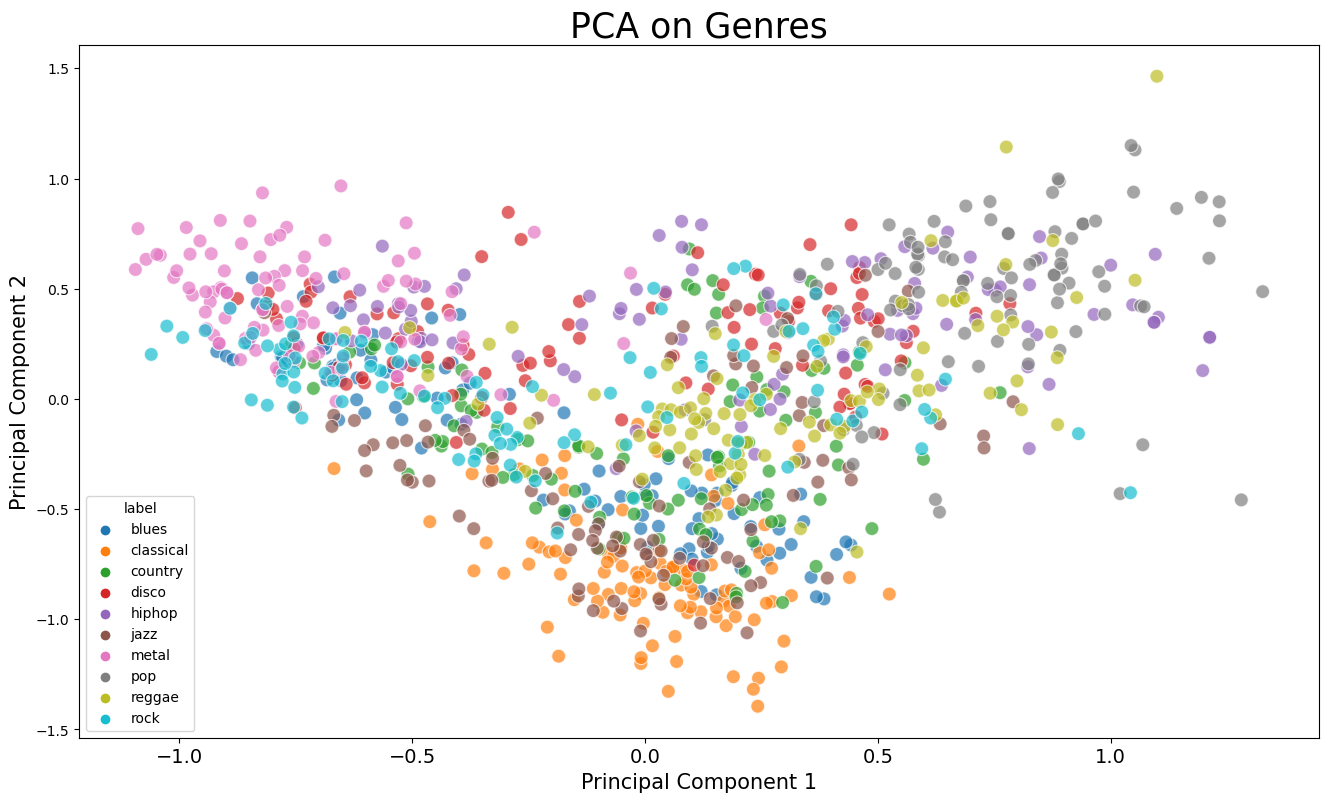

In [27]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

### **<span style="color: RED">8) Machine Learning Classification (Build MPL models)</span>**

**Libraries**

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

**Reading in the Data**

In [29]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [83]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   9990 non-null   int64  
 1   chroma_stft_mean         9990 non-null   float64
 2   chroma_stft_var          9990 non-null   float64
 3   rms_mean                 9990 non-null   float64
 4   rms_var                  9990 non-null   float64
 5   spectral_centroid_mean   9990 non-null   float64
 6   spectral_centroid_var    9990 non-null   float64
 7   spectral_bandwidth_mean  9990 non-null   float64
 8   spectral_bandwidth_var   9990 non-null   float64
 9   rolloff_mean             9990 non-null   float64
 10  rolloff_var              9990 non-null   float64
 11  zero_crossing_rate_mean  9990 non-null   float64
 12  zero_crossing_rate_var   9990 non-null   float64
 13  harmony_mean             9990 non-null   float64
 14  harmony_var             

In [84]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [87]:
X = data.drop(['label'],axis=1)
y = data['label'] 

In [88]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6993, 58), (2997, 58), (6993,), (2997,))

In [90]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

### **<span style="color: RED">Build MPL models (Keras)</span>**

In [92]:
import catboost as cb

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,LearningRateScheduler
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# catboost
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
model_assess(cbc,"Cat Boost Classifier")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.51518 

Accuracy Stochastic Gradient Descent : 0.668 

Accuracy KNN : 0.80414 

Accuracy Decission trees : 0.65999 

Accuracy Random Forest : 0.80814 

Accuracy Support Vector Machine : 0.74775 

Accuracy Logistic Regression : 0.68402 

Accuracy Neural Nets : 0.68302 

Accuracy Cat Boost Classifier : 0.90524 

[19:24:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Cross Gradient Booster : 0.91058 

[19:25:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you

Accuracy : 0.90524 



<AxesSubplot: >

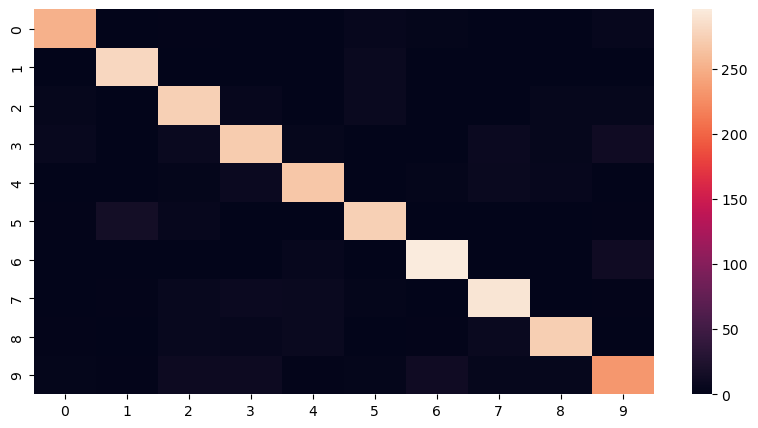

In [93]:
# Final model
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
cbc.fit(X_train, y_train)


preds = cbc.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confus_mat = confusion_matrix(y_test, preds) 
plt.figure(figsize = (10, 5))
sns.heatmap(confus_mat)

In [94]:
X_train.shape[1]

58

In [106]:
model = Sequential()

model.add(Flatten(input_shape=(58,)))
model.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer = keras.regularizers.l2(0.003)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 58)                0         
                                                                 
 dense_25 (Dense)            (None, 512)               30208     
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                16448     
                                                                 
 dropout_17 (Dropout)        (None, 64)               

In [107]:
early_stopping= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5) 
check_pointer = ModelCheckpoint(filepath = 'clf-resnet-checkpoint.hdf5',verbose=1,save_best_only=True) 
reduce_lr = ReduceLROnPlateau(monitor='val_loss',mode='min',verbose=1,patience=5,min_delta = 0.0001,factor=0.2) 
callbacks = [check_pointer,early_stopping,reduce_lr]

In [108]:
# compile the model
adam = keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [109]:
hist = model.fit(X_train, y_train,
                 validation_data = (X_test,y_test),
                 epochs = 100,
                 batch_size = 32, callbacks = [check_pointer,early_stopping])

Epoch 1/100
212/219 [============================>.] - ETA: 0s - loss: 4.0525 - accuracy: 0.1288
Epoch 1: val_loss improved from inf to 3.63978, saving model to clf-resnet-checkpoint.hdf5
219/219 [==============================] - 2s 7ms/step - loss: 4.0413 - accuracy: 0.1303 - val_loss: 3.6398 - val_accuracy: 0.2165
Epoch 2/100
219/219 [==============================] - ETA: 0s - loss: 3.3714 - accuracy: 0.2042
Epoch 2: val_loss improved from 3.63978 to 3.03123, saving model to clf-resnet-checkpoint.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 3.3714 - accuracy: 0.2042 - val_loss: 3.0312 - val_accuracy: 0.3260
Epoch 3/100
216/219 [============================>.] - ETA: 0s - loss: 2.9051 - accuracy: 0.2746
Epoch 3: val_loss improved from 3.03123 to 2.64812, saving model to clf-resnet-checkpoint.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.9025 - accuracy: 0.2754 - val_loss: 2.6481 - val_accuracy: 0.3657
Epoch 4/100
218/219 [==============

In [110]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

94/94 [==============================] - 0s 2ms/step - loss: 1.0893 - accuracy: 0.6930
Test accuracy: 0.6930263638496399


<Figure size 2000x500 with 0 Axes>

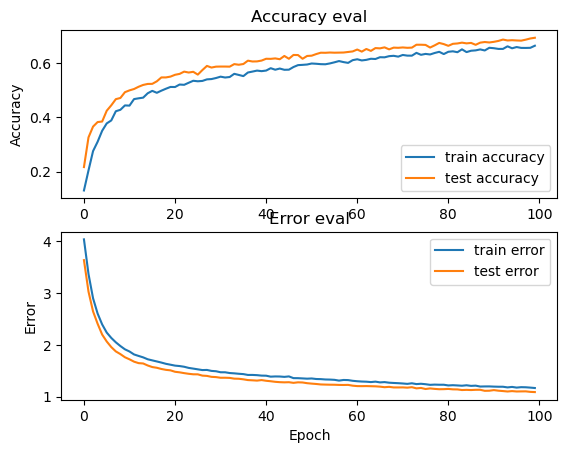

In [111]:
plt.figure(figsize=(20,5))
fig, axs = plt.subplots(2)

# accuracy 
axs[0].plot(hist.history["accuracy"], label="train accuracy")
axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")
    
# Error 
axs[1].plot(hist.history["loss"], label="train error")
axs[1].plot(hist.history["val_loss"], label="test error")    
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")
    
plt.show()